# Fit a complex model

Let's fit a complex model coming from the chemical engineering field.

## Select model

We select the modified Crank diffusion model:

In [1]:
import warnings
import numpy as np
import pandas as pd
from scifit.solvers.specials import CrankDiffusionFitSolver

Which solve the diffusion of chemical through a sphere:

$$\gamma(t) = \frac{C(t,R)}{C(0,R)} = \frac{\alpha}{1 + \alpha} + 6 \alpha \sum\limits_{i=1}^\infty \frac{\exp \left(-\mathcal{D}\frac{q_n^2 t}{R^2}\right)}{9(\alpha + 1) + \alpha^2q_n^2}$$

Where the $q_n$ terms are solution of a rational trigonometric equation such as:

$$\forall q_n \in \mathbb{R}^+_0 \, | \, \tan(q_n) = \frac{3 q_n}{3 + \alpha q_n^2}$$

And the modified $\alpha$ coefficient equals to:

$$\alpha = \frac{V_l}{V_s} \rightarrow \alpha' = \frac{V_l}{V_s K_p}$$


Now create a new solver with two physical known parameters:

In [2]:
solver = CrankDiffusionFitSolver(alpha=3.9, radius=1.9e-3)

## Load data

Now we generate some synthetic dataset for the given problem:

In [3]:
data = solver.synthetic_dataset(
    xmin=1e0, xmax=1e6, dimension=1, resolution=20, mode="log",
    parameters=np.array([3.9, 2e-11]),
    sigma=0.075, scale_mode="auto", seed=1234
)

In [4]:
data.sample(5)

,x0,y,sy,yref,ynoise
id,,,,,
7,78.475997,0.949934,0.01814,0.934341,0.015593
10,695.192796,0.788471,0.01814,0.829153,-0.040683
1,1.000000,0.992288,0.01814,0.983736,0.008552
6,37.926902,0.969392,0.01814,0.953299,0.016093
9,335.981829,0.874125,0.01814,0.873840,0.000285


We load data to the solver:

In [5]:
solver.store(data=data)

In [6]:
solver.stored()

True

## Solve Fit

Everything is setup, we can solve our problem:

In [7]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    solution = solver.fit(p0=np.array([10.0, 1e-10]))

In [8]:
solver.solved()

True

In [9]:
print(solution["message"])

Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000


In [10]:
print(solution["parameters"])

[3.90199070e+00 2.03542485e-11]


In [11]:
print(np.diag(solution["covariance"]))

[1.55454700e-02 5.95242545e-24]


As we can see, parameters have been properly regressed.

## Render solution

Finally we can render fit and loss function to check the dynamic:

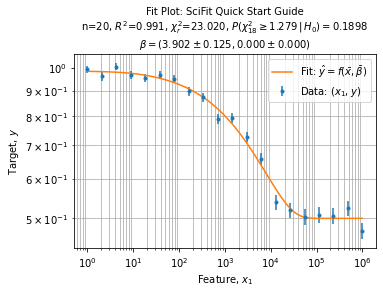

In [12]:
axe = solver.plot_fit(title="SciFit Quick Start Guide", log_x=True, log_y=True)
axe.grid(which="both")

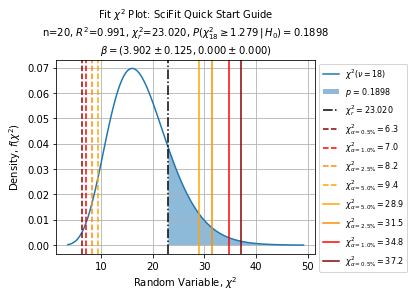

In [13]:
axe = solver.plot_chi_square(title="SciFit Quick Start Guide")

If automatic domains does not match your expectations:

In [14]:
solver.parameter_domains(ratio=0.15)

,0,1
min,0.975498,5.088562e-12
max,6.828484,3.561993e-11


Simply create desired boundaries:

In [15]:
domains = pd.DataFrame({"min": [1., 1e-12], "max": [20., 2.5e-10]}).T
domains

,0,1
min,1.0,1.000000e-12
max,20.0,2.500000e-10


And provide it to the plotter (resolution is low because the loss function is quite CPU intensive and parameter space is large):

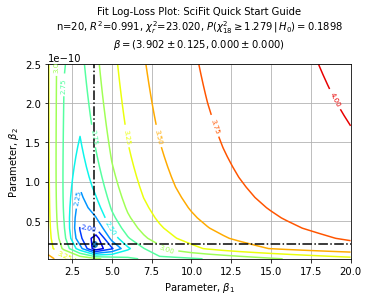

In [16]:
axe = solver.plot_loss(
    title="SciFit Quick Start Guide", resolution=20,
    domains=domains, include_origin=False, include_unit=False,
    log_loss=True, log_x=False, log_y=False,
)

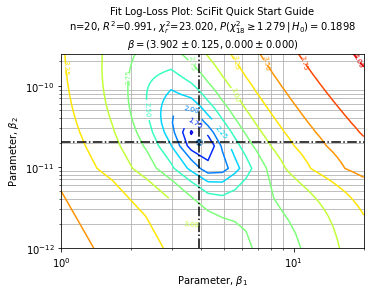

In [17]:
axe = solver.plot_loss(
    title="SciFit Quick Start Guide", resolution=25,
    domains=domains, include_origin=False, include_unit=False,
    log_loss=True, log_x=True, log_y=True,
)
axe.grid(which="both")

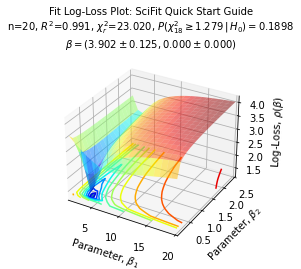

In [18]:
axe = solver.plot_loss_low_dimension(
    title="SciFit Quick Start Guide", resolution=20,
    domains=domains, include_origin=False, include_unit=False, surface=True,
    log_loss=True,
)